In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import random
from google.colab import drive
from google.colab.patches import cv2_imshow


## Loading Dataset from Google Drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.listdir("/content/drive/My Drive/ASL")

['D',
 'X',
 'A',
 'U',
 'B',
 'E',
 'Y',
 'C',
 'V',
 'W',
 'L',
 'G',
 'O',
 'P',
 'F',
 'M',
 'H',
 'N',
 'I',
 'K',
 'T',
 'R',
 'Q',
 'S',
 'training_data.pkl',
 'testing_data.pkl',
 'model.h5']

In [4]:
CATEGORIES = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
print(CATEGORIES)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


In [5]:
len(CATEGORIES)

24

In [6]:
import pickle 

In [7]:
infile = open('/content/drive/My Drive/ASL/training_data.pkl','rb')
train = pickle.load(infile)
infile.close()

In [8]:
len(train)

3977

In [9]:
infile = open('/content/drive/My Drive/ASL/testing_data.pkl','rb')
test = pickle.load(infile)
infile.close()

In [10]:
len(test)

995

In [11]:
train[0][0].shape

(100, 100)

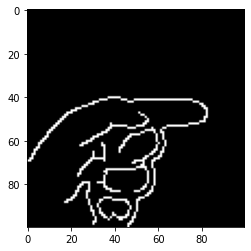

In [12]:
plt.imshow(train[0][0], cmap='gray')

In [13]:
CATEGORIES[train[0][1]]

'G'

In [14]:
train[0][0].shape

(100, 100)

In [15]:
img = train[0][0]
img.shape

(100, 100)

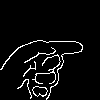

In [16]:
cv2_imshow(img)

In [17]:
img = np.expand_dims(img, axis=2)
img.shape

(100, 100, 1)

## Creating X_train, X_test, y_train, y_test

In [18]:
X_train = np.zeros((len(train),100,100))
y_train = np.zeros((len(train),1), dtype = int)
for i in range(len(train)) :
  X_train[i] = train[i][0]
  y_train[i] = train[i][1]


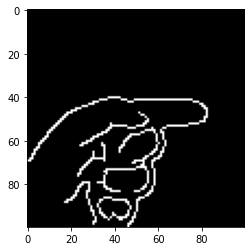

In [19]:
plt.imshow(X_train[0], cmap='gray')

In [20]:
CATEGORIES[y_train[0][0]]

'G'

In [21]:
X_train.shape

(3977, 100, 100)

In [22]:
X_train[0].shape

(100, 100)

In [23]:
y_train.shape

(3977, 1)

In [24]:
X_test = np.zeros((len(test),100,100))
y_test = np.zeros((len(test),1), dtype = int)
for i in range(len(test)) :
  X_test[i] = test[i][0]
  y_test[i] = test[i][1]

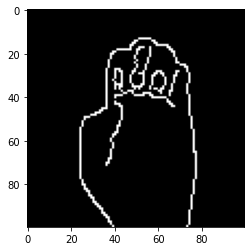

In [25]:
plt.imshow(X_test[0], cmap='gray')

In [26]:
CATEGORIES[y_test[0][0]]

'E'

In [27]:
# Resizing X_train, X_test to (len(),100,100,1) since its necessary for training and testing in model
X_train = np.expand_dims(X_train, axis=3)
X_train.shape

(3977, 100, 100, 1)

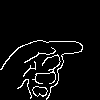

In [28]:
cv2_imshow(X_train[0])

In [29]:
X_test = np.expand_dims(X_test, axis=3)
X_test.shape

(995, 100, 100, 1)

In [30]:
pip install tensorflow

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout,BatchNormalization

In [32]:
tf.__version__

'2.4.1'

In [33]:
tf.keras.__version__

'2.4.0'

In [36]:
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape = (100,100,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(MaxPooling2D((2,2)))

In [37]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(24,activation='softmax'))

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 100, 100, 32)      320       
_________________________________________________________________
batch_normalization_2 (Batch (None, 100, 100, 32)      128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 100, 100, 64)      256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 128)      

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size = 20, validation_data=(X_test, y_test))

Epoch 1/10
199/199 [==============================] - 221s 1s/step - loss: 7.1931 - accuracy: 0.3453 - val_loss: 0.2876 - val_accuracy: 0.9196
Epoch 2/10
199/199 [==============================] - 219s 1s/step - loss: 0.1234 - accuracy: 0.9620 - val_loss: 0.0975 - val_accuracy: 0.9799
Epoch 3/10
199/199 [==============================] - 219s 1s/step - loss: 0.0132 - accuracy: 0.9971 - val_loss: 0.0995 - val_accuracy: 0.9769
Epoch 4/10
199/199 [==============================] - 219s 1s/step - loss: 0.0229 - accuracy: 0.9932 - val_loss: 0.1498 - val_accuracy: 0.9618
Epoch 5/10
199/199 [==============================] - 219s 1s/step - loss: 0.0438 - accuracy: 0.9910 - val_loss: 0.1223 - val_accuracy: 0.9658
Epoch 6/10
199/199 [==============================] - 219s 1s/step - loss: 0.0408 - accuracy: 0.9898 - val_loss: 0.1516 - val_accuracy: 0.9578
Epoch 7/10
199/199 [==============================] - 219s 1s/step - loss: 0.0902 - accuracy: 0.9771 - val_loss: 0.2096 - val_accuracy: 0.9568

Text(0.5, 1.0, 'Accuracy evolution')

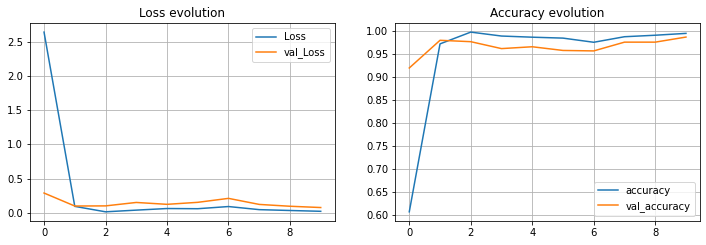

In [42]:
#Visualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')

plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

In [ ]:
# model.save('/content/drive/My Drive/ASL/model.h5')

In [43]:
model = load_model('/content/drive/My Drive/ASL/model.h5')

In [44]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print('model, accuracy: {:5.2f}%'.format(100 * acc))

32/32 - 7s - loss: 0.0207 - accuracy: 0.9950
model, accuracy: 99.50%


## Predictions for the test data
predicted_classes = np.argmax(model.predict(X_test), axis=-1)

In [45]:
predicted_classes = np.argmax(model.predict(X_test), axis=-1) # returns an array of all predictions

In [46]:
predicted_classes

array([ 4,  5,  9, 23,  5, 20, 10, 21, 10,  2, 15,  2, 15, 22,  9, 16,  1,
       11, 16,  3,  8, 13, 14,  6, 15,  8,  0,  2,  9, 20, 16,  0,  2,  5,
       18,  6, 20,  2,  9, 13, 19, 23,  8,  7, 19, 13,  6, 14,  2, 22, 13,
       19, 23,  1, 14, 16, 17,  6,  4,  2, 16,  4, 19, 21, 11,  0, 23, 22,
        0,  6,  3,  4, 23, 13, 22, 10, 22, 21, 23, 14, 11, 13, 16, 13, 21,
       14, 13,  2,  6,  9, 14,  6, 11,  4,  1,  6, 10, 19,  2, 22,  1,  1,
       14,  2, 17,  8, 16, 20, 16, 11,  3, 22, 15,  4,  7,  1, 12, 14, 13,
       19, 17,  0, 17, 16,  3, 15, 18, 11, 12, 11,  1,  1, 12, 17,  8,  8,
       16, 12,  2,  9,  5, 14,  6, 11,  9,  9, 11, 13,  3,  4, 22, 19, 14,
        4,  0,  3,  3, 17,  0,  7, 17,  7, 15,  6,  9, 18,  7,  0,  8, 20,
       22,  1,  1, 15, 13,  4, 20, 13, 18, 15,  6, 12, 21, 22, 12,  3, 10,
       12, 23, 18, 11, 12, 14, 14, 13,  1, 10,  9, 12,  9,  7, 20,  6,  8,
       16, 16, 16,  1, 18,  4,  2,  7, 12, 13,  5,  0,  4,  1,  6, 11, 12,
        3,  0, 20, 21, 19

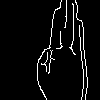

In [47]:
cv2_imshow(X_test[100])

In [48]:
CATEGORIES[y_test[100][0]]

'B'

In [49]:
CATEGORIES[predicted_classes[100]]

'B'

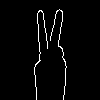

In [50]:
cv2_imshow(X_test[5])

In [51]:
CATEGORIES[y_test[5][0]]

'V'

In [52]:
CATEGORIES[predicted_classes[5]]

'V'

In [53]:
def predict(img):
  img = np.expand_dims(img, axis=0)
  return CATEGORIES[np.argmax(model.predict(img))]

In [54]:
predict(X_test[5])

'V'

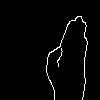

In [55]:
cv2_imshow(X_test[16])

In [57]:
CATEGORIES[y_test[16][0]]

'B'

In [58]:
predict(X_test[16])

'B'